In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
housing_data = pd.read_csv('AmesHousing.tsv',delimiter='\t')
housing_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
def transform_features(df):
    return df
    

In [5]:
def select_features(df):
    return df[['Gr Liv Area','SalePrice']]

In [6]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    train_cols = select_features(train).drop('SalePrice',axis=1).columns.values
    
    lr = LinearRegression()
    lr.fit(train[train_cols],train['SalePrice'])
    prediction = lr.predict(test[train_cols])
    mse = mean_squared_error(prediction,test['SalePrice'])
    rmse = mse ** 0.5
    return rmse

In [7]:
train_and_test(housing_data)

57088.251612639091

In [8]:
housing_data.isnull().sum()


Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

## Updating transform_features

In [9]:
def transform_features(df):
    null_series = df.isnull().sum()
    #droping null columns with more than 5% null values
    df = df.drop(null_series[null_series > 140].index,axis=1)
    #droping text columns with atleast a single null value
    text_data_counts = df.select_dtypes(include=['object']).isnull().sum()
    df = df.drop(text_data_counts[text_data_counts > 0].index,axis=1)
    
    df.fillna(df.mode().iloc[0],inplace=True)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    
    ## Create new columns
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod

    ## Drop rows with negative values for both of these new features
    df = df.drop([1702, 2180, 2181], axis=0)

    ## No longer need original year columns
    df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)
    
    ## Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)

    ## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"],axis=1)
    
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):
    df = transform_features(df)
    train = df[:1460]
    test = df[1460:]
    train_cols = select_features(train).drop('SalePrice',axis=1).columns.values
    
    lr = LinearRegression()
    lr.fit(train[train_cols],train['SalePrice'])
    prediction = lr.predict(test[train_cols])
    mse = mean_squared_error(prediction,test['SalePrice'])
    rmse = mse ** 0.5
    return rmse

In [10]:
rmse = train_and_test(housing_data)
rmse

55275.367312413073

In [11]:
transformed_housing_data = transform_features(housing_data)
numeric_df = transformed_housing_data.select_dtypes(include=['int', 'float'])
numeric_cols = numeric_df.columns.values
numeric_housing_data = transformed_housing_data[numeric_cols]
numeric_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 33 columns):
MS SubClass          2927 non-null int64
Lot Area             2927 non-null int64
Overall Qual         2927 non-null int64
Overall Cond         2927 non-null int64
Mas Vnr Area         2927 non-null float64
BsmtFin SF 1         2927 non-null float64
BsmtFin SF 2         2927 non-null float64
Bsmt Unf SF          2927 non-null float64
Total Bsmt SF        2927 non-null float64
1st Flr SF           2927 non-null int64
2nd Flr SF           2927 non-null int64
Low Qual Fin SF      2927 non-null int64
Gr Liv Area          2927 non-null int64
Bsmt Full Bath       2927 non-null float64
Bsmt Half Bath       2927 non-null float64
Full Bath            2927 non-null int64
Half Bath            2927 non-null int64
Bedroom AbvGr        2927 non-null int64
Kitchen AbvGr        2927 non-null int64
TotRms AbvGrd        2927 non-null int64
Fireplaces           2927 non-null int64
Garage Cars       

In [12]:
df_corr = numeric_housing_data.corr()
sorted_corrs = df_corr['SalePrice'].abs().sort_values()
strong_corrs = sorted_corrs[sorted_corrs > 0.4]
strong_corrs

BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

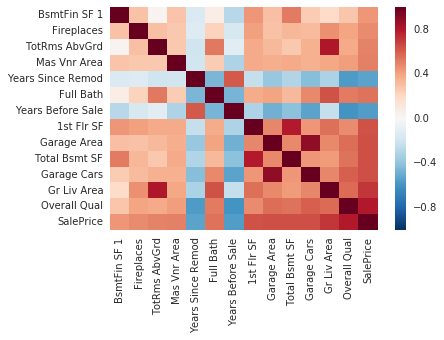

In [13]:
corrmat = numeric_housing_data[strong_corrs.index].corr()
sns.heatmap(corrmat)

In [14]:
# Dropping non co-related columns
drop_corrs = sorted_corrs[sorted_corrs < 0.4].index
transformed_housing_data.drop(drop_corrs,inplace=True,axis=1)

### What categorical columns to keep

In [15]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

1> Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?
2> If a categorical column has hundreds of unique values (or categories), should we keep it? When we dummy code this column, hundreds of columns will need to be added back to the data frame

In [16]:
## Which categorical columns have we still carried with us? We'll test tehse 
transform_cat_cols = []
for col in nominal_features:
    if col in transformed_housing_data.columns:
        transform_cat_cols.append(col)

## How many unique values in each categorical column?
uniqueness_counts = transformed_housing_data[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
print(uniqueness_counts)

Street           2
Central Air      2
Land Contour     4
Lot Config       5
Bldg Type        5
Roof Style       6
Foundation       6
Heating          6
MS Zoning        7
Condition 2      8
House Style      8
Roof Matl        8
Condition 1      9
Exterior 1st    16
Exterior 2nd    17
Neighborhood    28
dtype: int64


In [17]:
## Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transform_df = transformed_housing_data.drop(drop_nonuniq_cols, axis=1)

In [18]:
## Select just the remaining text columns and convert to categorical
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')
    
## Create dummy columns and add back to the dataframe!
transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1)

## update select_features()

In [29]:
def transform_features(df):
    null_series = df.isnull().sum()
    #droping null columns with more than 5% null values
    df = df.drop(null_series[null_series > 140].index,axis=1)
    #droping text columns with atleast a single null value
    text_data_counts = df.select_dtypes(include=['object']).isnull().sum()
    df = df.drop(text_data_counts[text_data_counts > 0].index,axis=1)
    
    df.fillna(df.mode().iloc[0],inplace=True)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    
    ## Create new columns
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod

    ## Drop rows with negative values for both of these new features
    df = df.drop([1702, 2180, 2181], axis=0)

    ## No longer need original year columns
    df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)
    
    ## Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)

    ## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"],axis=1)
    
    return df

def select_features(df,coeff_threshold=0.4,unique_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > unique_threshold].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1)
    
    return df


def train_and_test(df):
    df = transform_features(df) # drop and add new columns
    df = select_features(df) # select only good corr features and add categorical features
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    train_cols = numeric_df.columns.drop("SalePrice")
    train = numeric_df[:1460]
    test = numeric_df[1460:]
    
    lr = LinearRegression()
    lr.fit(train[train_cols],train['SalePrice'])
    prediction = lr.predict(test[train_cols])
    mse = mean_squared_error(prediction,test['SalePrice'])
    rmse = mse ** 0.5
    return rmse

In [30]:
rmse = train_and_test(housing_data)
rmse

33367.287183403612

## adding k-fold to train_and_test()

In [51]:
def transform_features(df):
    null_series = df.isnull().sum()
    #droping null columns with more than 5% null values
    df = df.drop(null_series[null_series > 140].index,axis=1)
    #droping text columns with atleast a single null value
    text_data_counts = df.select_dtypes(include=['object']).isnull().sum()
    df = df.drop(text_data_counts[text_data_counts > 0].index,axis=1)
    
    df.fillna(df.mode().iloc[0],inplace=True)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    
    ## Create new columns
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod

    ## Drop rows with negative values for both of these new features
    df = df.drop([1702, 2180, 2181], axis=0)

    ## No longer need original year columns
    df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)
    
    ## Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)

    ## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"],axis=1)
    
    return df

def select_features(df,coeff_threshold=0.4,unique_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > unique_threshold].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1)
    
    return df


def train_and_test(df,k):
    df = transform_features(df) # drop and add new columns
    df = select_features(df) # select only good corr features and add categorical features
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    train_cols = numeric_df.columns.drop("SalePrice")
    
    if(k==0):
        train = df[:1460]
        test = df[1460:]
    
        lr = LinearRegression()
        lr.fit(train[train_cols],train['SalePrice'])
        prediction1 = lr.predict(test[train_cols])
        mse1 = mean_squared_error(prediction1,test['SalePrice'])
        
        return mse1**0.5
    elif(k==1):
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = numeric_df.sample(frac=1, )
        train = numeric_df[:1460]
        test = numeric_df[1460:]
        
        lr = LinearRegression()
        lr.fit(train[train_cols],train['SalePrice'])
        prediction1 = lr.predict(test[train_cols])
        mse1 = mean_squared_error(prediction1,test['SalePrice'])
        
        return mse1**0.5
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        
        for train_index, test_index in kf.split(numeric_df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr = LinearRegression()
            lr.fit(train[train_cols], train["SalePrice"])
            predictions = lr.predict(test[train_cols])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

In [53]:
rmses = []
for k in range(10):
    rmse = train_and_test(housing_data,k)
    rmses.append(rmse)
print(rmses)

[33367.287183403612, 33367.287183403612, 30273.7526961115, 29084.975659437467, 28729.464772843494, 29449.824042869866, 28698.369408996772, 28792.081697044476, 28843.808110444839, 28671.681149712545]
